In [2]:
#basic package
import tqdm
import os
import numpy as np
import pandas as pd
import sys
import time
import glob
import datetime as dt
import itertools
import math
import random
import pickle
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from numpy.linalg import eig #eigenvector decomposition

#plot
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.colors import LinearSegmentedColormap  # to define our own palette for plots

In [3]:
PACKAGE_PARENT = '../'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))
import config_origins as config

path_extracted_data = config.path_extracted_data
id_run = config.id_run
print(id_run)

ALLDATA_


# Download mean and CI estimates

In [3]:
df_IC = pd.read_csv(os.path.join(path_extracted_data,'df_CI_BRMS_BS_pred_allvar_FINAL.csv'), sep=',')
print(df_IC.shape) 
display(df_IC.head(3))

df_mean = pd.read_csv(os.path.join(path_extracted_data,'df_mean_BRMS_BS_pred_allvar_FINAL.csv'), sep=',')
print(df_mean.shape) 
display(df_mean.head(3))

#merge both estiamtes and the CI
df = pd.merge(df_mean, df_IC, on=['Unnamed: 0'], how='outer')
df.rename(columns={'Unnamed: 0':'parameter','x':'value_mean'}, inplace=True)
df['text'] = df.apply(lambda x: "%.2f" % round(x['value_mean'],2)+' ['+"%.2f" % round(x['lower'],2)+', '+"%.2f" % round(x['upper'],2)+']', 
                          axis=1)
#separate parameters family (random effect, fexed effect, sigma, correlatiom)
display(list(df['parameter'].unique()))
df['type'] = df['parameter'].map(lambda x: x.split('_')[0])
display(df['type'].value_counts())

#henID intercept random intercept
df['HenID'] = df['parameter'].map(lambda x: x.split(',')[0].split('[')[-1] if 'hen_' in x else None)
#else None, otherwise will utput the entire name (i.e. x)
print(df['HenID'].unique())

#mvt variable for the hen intercepts to be visualised
df['mvtvariable'] = df['parameter'].map(lambda x: x.split('r_HenID__')[-1].split('[')[0] if ('r_HenID__' in x) \
                                        & ('cor_HenID' not in x) else None)
li_mvt = [i for i in df['mvtvariable'].unique() if i!=None]
print(li_mvt)
print('------------------all dataframe')
print(df.shape) 
display(df.head(3))

#correlations dataframe
df_cor_summarized = df[df['type']=='cor'].copy()
for mvt in li_mvt:
    df_cor_summarized[mvt] = df_cor_summarized['parameter'].map(lambda x: mvt in x)
print('------------------correlations dataframe')
display(df_cor_summarized)

#sd dataframe
df_sd_summarized = df[df['type']=='sd'].copy()
df_sd_summarized['parameter'] = df_sd_summarized['parameter'].map(lambda x: x.split('sd_HenID__')[-1])
print('------------------sd dataframe')
display(df_sd_summarized)

(1011, 3)


,Unnamed: 0,lower,upper
0,b_scalefoodsameDurTimingr50final_Intercept,-0.061434,0.283923
1,b_scaleverticaltraveldistancefulllightperinsid...,-0.142802,0.194295
2,b_midcumZ4hMorning_Intercept,1.473646,1.531207


(1011, 2)


,Unnamed: 0,x
0,b_scalefoodsameDurTimingr50final_Intercept,0.109785
1,b_scaleverticaltraveldistancefulllightperinsid...,0.023829
2,b_midcumZ4hMorning_Intercept,1.502107


['b_scalefoodsameDurTimingr50final_Intercept',
 'b_scaleverticaltraveldistancefulllightperinsideh_Intercept',
 'b_midcumZ4hMorning_Intercept',
 'b_SleepingUppest_Intercept',
 'b_WentinWG_Intercept',
 'b_scalefoodsameDurTimingr50final_TreatmentOFH',
 'b_scalefoodsameDurTimingr50final_FoodPenIDFoodPenID5M8',
 'b_scalefoodsameDurTimingr50final_FoodPenIDFoodPenID9M12',
 'b_scalefoodsameDurTimingr50final_scaleweightInterp',
 'b_scalefoodsameDurTimingr50final_scaleKBFInterp',
 'b_scalefoodsameDurTimingr50final_scaleDIB',
 'b_scaleverticaltraveldistancefulllightperinsideh_TreatmentOFH',
 'b_scaleverticaltraveldistancefulllightperinsideh_scaleweightInterp',
 'b_scaleverticaltraveldistancefulllightperinsideh_scaleKBFInterp',
 'b_scaleverticaltraveldistancefulllightperinsideh_scaleDIB',
 'b_midcumZ4hMorning_TreatmentOFH',
 'b_midcumZ4hMorning_scaleweightInterp',
 'b_midcumZ4hMorning_scaleKBFInterp',
 'b_midcumZ4hMorning_scaleDIB',
 'b_SleepingUppest_TreatmentOFH',
 'b_SleepingUppest_scaleweightI

r        965
b         27
cor       10
sd         5
sigma      2
shape      1
lp         1
Name: type, dtype: int64

[None 'hen_1' 'hen_10' 'hen_101' 'hen_102' 'hen_105' 'hen_106' 'hen_107'
 'hen_108' 'hen_109' 'hen_111' 'hen_112' 'hen_113' 'hen_115' 'hen_116'
 'hen_118' 'hen_119' 'hen_12' 'hen_120' 'hen_122' 'hen_123' 'hen_124'
 'hen_126' 'hen_127' 'hen_128' 'hen_13' 'hen_131' 'hen_133' 'hen_134'
 'hen_135' 'hen_136' 'hen_137' 'hen_138' 'hen_139' 'hen_14' 'hen_140'
 'hen_141' 'hen_142' 'hen_143' 'hen_144' 'hen_145' 'hen_146' 'hen_147'
 'hen_149' 'hen_15' 'hen_150' 'hen_151' 'hen_152' 'hen_153' 'hen_154'
 'hen_155' 'hen_156' 'hen_158' 'hen_159' 'hen_163' 'hen_164' 'hen_165'
 'hen_166' 'hen_167' 'hen_168' 'hen_169' 'hen_17' 'hen_170' 'hen_171'
 'hen_172' 'hen_173' 'hen_174' 'hen_175' 'hen_177' 'hen_18' 'hen_180'
 'hen_181' 'hen_182' 'hen_183' 'hen_184' 'hen_185' 'hen_186' 'hen_187'
 'hen_188' 'hen_189' 'hen_19' 'hen_190' 'hen_191' 'hen_192' 'hen_193'
 'hen_194' 'hen_195' 'hen_196' 'hen_197' 'hen_198' 'hen_199' 'hen_2'
 'hen_20' 'hen_200' 'hen_201' 'hen_202' 'hen_203' 'hen_204' 'hen_205'
 'hen_206' 'he

,parameter,value_mean,lower,upper,text,type,HenID,mvtvariable
0,b_scalefoodsameDurTimingr50final_Intercept,0.109785,-0.061434,0.283923,"0.11 [-0.06, 0.28]",b,None,None
1,b_scaleverticaltraveldistancefulllightperinsid...,0.023829,-0.142802,0.194295,"0.02 [-0.14, 0.19]",b,None,None
2,b_midcumZ4hMorning_Intercept,1.502107,1.473646,1.531207,"1.50 [1.47, 1.53]",b,None,None


------------------correlations dataframe


,parameter,value_mean,lower,upper,text,type,HenID,mvtvariable,scalefoodsameDurTimingr50final,scaleverticaltraveldistancefulllightperinsideh,midcumZ4hMorning,SleepingUppest,WentinWG
32,cor_HenID__scalefoodsameDurTimingr50final_Inte...,0.465059,0.342906,0.582079,"0.47 [0.34, 0.58]",cor,None,None,True,True,False,False,False
33,cor_HenID__scalefoodsameDurTimingr50final_Inte...,-0.093176,-0.242577,0.064308,"-0.09 [-0.24, 0.06]",cor,None,None,True,False,True,False,False
34,cor_HenID__scaleverticaltraveldistancefullligh...,-0.022116,-0.163305,0.129534,"-0.02 [-0.16, 0.13]",cor,None,None,False,True,True,False,False
35,cor_HenID__scalefoodsameDurTimingr50final_Inte...,-0.186059,-0.340194,-0.036045,"-0.19 [-0.34, -0.04]",cor,None,None,True,False,False,True,False
36,cor_HenID__scaleverticaltraveldistancefullligh...,-0.241551,-0.384718,-0.092114,"-0.24 [-0.38, -0.09]",cor,None,None,False,True,False,True,False
37,cor_HenID__midcumZ4hMorning_Intercept__Sleepin...,-0.043208,-0.193828,0.113411,"-0.04 [-0.19, 0.11]",cor,None,None,False,False,True,True,False
38,cor_HenID__scalefoodsameDurTimingr50final_Inte...,0.290938,0.148313,0.437786,"0.29 [0.15, 0.44]",cor,None,None,True,False,False,False,True
39,cor_HenID__scaleverticaltraveldistancefullligh...,0.517974,0.402368,0.632857,"0.52 [0.40, 0.63]",cor,None,None,False,True,False,False,True
40,cor_HenID__midcumZ4hMorning_Intercept__WentinW...,-0.037997,-0.190538,0.118513,"-0.04 [-0.19, 0.12]",cor,None,None,False,False,True,False,True
41,cor_HenID__SleepingUppest_Intercept__WentinWG_...,0.047306,-0.111534,0.205395,"0.05 [-0.11, 0.21]",cor,None,None,False,False,False,True,True


------------------sd dataframe


,parameter,value_mean,lower,upper,text,type,HenID,mvtvariable
27,scalefoodsameDurTimingr50final_Intercept,0.560230,0.497516,0.623352,"0.56 [0.50, 0.62]",sd,None,None
28,scaleverticaltraveldistancefulllightperinsideh...,0.831390,0.748675,0.921345,"0.83 [0.75, 0.92]",sd,None,None
29,midcumZ4hMorning_Intercept,0.139983,0.125068,0.156168,"0.14 [0.13, 0.16]",sd,None,None
30,SleepingUppest_Intercept,2.275355,1.971221,2.588253,"2.28 [1.97, 2.59]",sd,None,None
31,WentinWG_Intercept,2.202747,1.909852,2.514359,"2.20 [1.91, 2.51]",sd,None,None


# Behavioural syndrome

### correlation matrix

In [6]:
dico_mvt_name = {'scalefoodsameDurTimingr50final':'food reactivity index',
                 'scaleverticaltraveldistancefulllightperinsideh':'vertical travelled distance',
                 'midcumZ4hMorning':'mid-nestbox zone usage',
                 'SleepingUppest':'has slept on top tier',
                 'WentinWG':'has been outside'}

['scalefoodsameDurTimingr50final', 'scaleverticaltraveldistancefulllightperinsideh', 'midcumZ4hMorning', 'SleepingUppest', 'WentinWG']
[[        nan  0.46505903 -0.09317565 -0.18605858  0.29093843]
 [        nan         nan -0.02211585 -0.24155086  0.51797437]
 [        nan         nan         nan -0.04320812 -0.03799724]
 [        nan         nan         nan         nan  0.04730633]
 [        nan         nan         nan         nan         nan]]


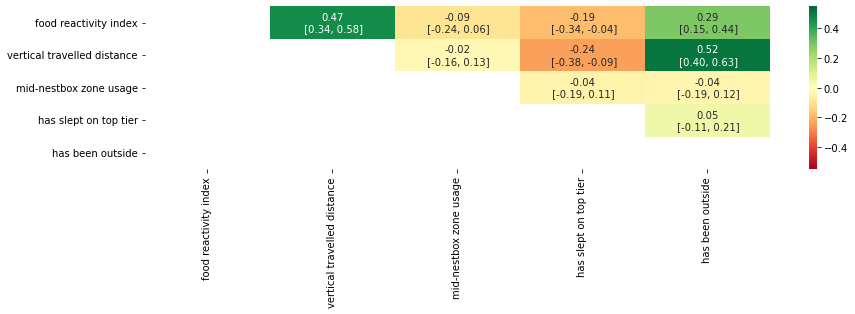

In [7]:
print(li_mvt)
CorrM = np.zeros(shape=(len(li_mvt), len(li_mvt)))
labels_ = np.array([['                                '] * len(li_mvt)] * len(li_mvt))
for i in range(0,len(li_mvt)):
    CorrM[i][i] = np.nan
    for j in range(i+1,len(li_mvt)):
        mvt1 = li_mvt[i]
        mvt2 = li_mvt[j]
        v = df_cor_summarized[(df_cor_summarized[mvt1])&(df_cor_summarized[mvt2])]['value_mean'].values[0]     
        CorrM[i][j] = v
        CorrM[j][i] = np.nan
        t = df_cor_summarized[(df_cor_summarized[mvt1])&(df_cor_summarized[mvt2])]['text'].values[0] 
        t = t.replace(' [','\n [')
        labels_[i][j] = t
        labels_[j][i] = ''
print(CorrM)
#print(labels_)
plt.figure(figsize=(14,3)) #9, 6.5
sns.heatmap(CorrM, cmap='RdYlGn', annot=labels_, fmt = '', 
            xticklabels=[dico_mvt_name[i] for i in li_mvt], yticklabels=[dico_mvt_name[i] for i in li_mvt],
           vmin=-0.55, vmax=0.55)
#fmt = ''is required for string labels
plt.xlabel('');
plt.ylabel('');
plt.savefig(os.path.join(path_extracted_data,'BS_corr.png'),dpi=300,format='png',bbox_inches='tight')
plt.show();

### eigenvector decomposition

In [8]:
#covariance matrix
#Cov(X,Y) = corr(X,Y) * SD(X) * SD(Y) 
print(li_mvt)
CovM = np.zeros(shape=(len(li_mvt), len(li_mvt)))
for i in range(0,len(li_mvt)):
    mvt1 = li_mvt[i]
    CovM[i][i] = round(df_sd_summarized[df_sd_summarized['parameter']==mvt1+'_Intercept']['value_mean'].values[0]**2,2)
    for j in range(i+1,len(li_mvt)):
        mvt2 = li_mvt[j]
        cor12 = df_cor_summarized[(df_cor_summarized[mvt1])&(df_cor_summarized[mvt2])]['value_mean'].values[0]  
        sd1 = df_sd_summarized[df_sd_summarized['parameter']==mvt1+'_Intercept']['value_mean'].values[0]
        sd2 = df_sd_summarized[df_sd_summarized['parameter']==mvt2+'_Intercept']['value_mean'].values[0]
        CovM[i][j] = round(cor12 * sd1 * sd2,2)
        CovM[j][i] = round(cor12 * sd1 * sd2,2)
print(CovM)
#eigen decomposition sorted by biggest eingenvalues
eigenValues, eigenVectors = eig(CovM)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
print(li_mvt)
print(eigenValues)
comp1 = list(eigenVectors[:,0])
comp2 = list(eigenVectors[:,1])
display(eigenVectors)#first columns: pc1 (multiple 0,0 by limvt0, 1,0 by VTD,... ;  second: pc2
print(comp1)
print(comp2)
print(sum(eigenValues))
#unit length vector
print(np.sqrt(sum([i*i for i in comp1])))
print(np.sqrt(sum([i*i for i in comp2])))
#--> the cov matrix shows really different variances, which will be unfarie to some var

['scalefoodsameDurTimingr50final', 'scaleverticaltraveldistancefulllightperinsideh', 'midcumZ4hMorning', 'SleepingUppest', 'WentinWG']
[[ 0.31  0.22 -0.01 -0.24  0.36]
 [ 0.22  0.69 -0.   -0.46  0.95]
 [-0.01 -0.    0.02 -0.01 -0.01]
 [-0.24 -0.46 -0.01  5.18  0.24]
 [ 0.36  0.95 -0.01  0.24  4.85]]
['scalefoodsameDurTimingr50final', 'scaleverticaltraveldistancefulllightperinsideh', 'midcumZ4hMorning', 'SleepingUppest', 'WentinWG']
[5.30697338 5.02983821 0.48554594 0.20814967 0.0194928 ]


array([[-7.37629453e-03,  9.93547386e-02, -4.42776479e-01,
        -8.89866795e-01, -4.64790695e-02],
       [ 1.02663779e-02,  2.39649918e-01, -8.58483679e-01,
         4.53016211e-01,  1.56398131e-02],
       [-2.55057038e-03, -9.67970175e-04,  7.11755083e-03,
         4.85399472e-02, -9.98792156e-01],
       [ 8.78752399e-01, -4.62326455e-01, -1.18496878e-01,
         1.95144276e-04, -2.63091462e-03],
       [ 4.77103665e-01,  8.47909114e-01,  2.29918666e-01,
        -2.36058429e-02, -1.54887659e-03]])

[-0.007376294532984567, 0.010266377939627815, -0.002550570379236957, 0.8787523990925381, 0.477103665300124]
[0.099354738598051, 0.23964991761057014, -0.0009679701750733698, -0.462326455122323, 0.8479091135464499]
11.050000000000002
1.0
0.9999999999999999


In [9]:
#https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
print(li_mvt)
Corr = np.zeros(shape=(len(li_mvt), len(li_mvt)))
for i in range(0,len(li_mvt)):
    Corr[i][i] = 1
    for j in range(i+1,len(li_mvt)):
        mvt1 = li_mvt[i]
        mvt2 = li_mvt[j]
        v = df_cor_summarized[(df_cor_summarized[mvt1])&(df_cor_summarized[mvt2])]['value_mean'].values[0]     
        Corr[i][j] = v
        Corr[j][i] = v
print(Corr)
#eigen decomposition sorted by biggest eingenvalues
eigenValues, eigenVectors = eig(Corr)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
#in R would simply be: eigen(Corr). same result
print(li_mvt)
print(eigenValues)
comp1 = list(eigenVectors[:,0])
comp2 = list(eigenVectors[:,1])
#unit length vector
print(np.sqrt(sum([i*i for i in comp1])))
print(eigenVectors)#first columns: pc1 (multiple 0,0 by limvt0, 1,0 by VTD,... ;  second: pc2
print('Explained var:')
li_exvar = [i/sum(eigenValues) for i in eigenValues]
print(sum(li_exvar))
li_exvar

['scalefoodsameDurTimingr50final', 'scaleverticaltraveldistancefulllightperinsideh', 'midcumZ4hMorning', 'SleepingUppest', 'WentinWG']
[[ 1.          0.46505903 -0.09317565 -0.18605858  0.29093843]
 [ 0.46505903  1.         -0.02211585 -0.24155086  0.51797437]
 [-0.09317565 -0.02211585  1.         -0.04320812 -0.03799724]
 [-0.18605858 -0.24155086 -0.04320812  1.          0.04730633]
 [ 0.29093843  0.51797437 -0.03799724  0.04730633  1.        ]]
['scalefoodsameDurTimingr50final', 'scaleverticaltraveldistancefulllightperinsideh', 'midcumZ4hMorning', 'SleepingUppest', 'WentinWG']
[1.91941302 1.07520912 0.97699574 0.63724915 0.39113298]
1.0
[[-0.53407746 -0.03616551  0.17030245 -0.7937323  -0.23332257]
 [-0.62353893 -0.03762946 -0.10020981  0.17823617  0.75363989]
 [ 0.07887846 -0.55454141 -0.80512364 -0.19358799 -0.0236986 ]
 [ 0.24189287  0.75141571 -0.41403279 -0.364877    0.26889384]
 [-0.51110321  0.35374333 -0.37590935  0.40940122 -0.55201628]]
Explained var:
1.0


[0.38388260317502365,
 0.21504182489124535,
 0.19539914719750798,
 0.127449829493318,
 0.0782265952429051]

In [10]:
df_allit = pd.read_csv(os.path.join(path_extracted_data,'BRMS_BS_pred_allvar_FINAL.csv'), sep=',')
print(df_allit.shape)  #(1250, 4044) ou (5000, 1011)
li_col = set([x for x in list(df_allit.columns) if 'cor_HenID__' in x]) #X*, where * is the number of chain
print(len(li_col))
display(li_col)
df_allit = df_allit[li_col].copy()
df_allit['run'] = df_allit.index
print(df_allit.shape)
display(df_allit.head(3))

(5000, 4045)
40


{'X1.cor_HenID__SleepingUppest_Intercept__WentinWG_Intercept',
 'X1.cor_HenID__midcumZ4hMorning_Intercept__SleepingUppest_Intercept',
 'X1.cor_HenID__midcumZ4hMorning_Intercept__WentinWG_Intercept',
 'X1.cor_HenID__scalefoodsameDurTimingr50final_Intercept__SleepingUppest_Intercept',
 'X1.cor_HenID__scalefoodsameDurTimingr50final_Intercept__WentinWG_Intercept',
 'X1.cor_HenID__scalefoodsameDurTimingr50final_Intercept__midcumZ4hMorning_Intercept',
 'X1.cor_HenID__scalefoodsameDurTimingr50final_Intercept__scaleverticaltraveldistancefulllightperinsideh_Intercept',
 'X1.cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__SleepingUppest_Intercept',
 'X1.cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__WentinWG_Intercept',
 'X1.cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__midcumZ4hMorning_Intercept',
 'X2.cor_HenID__SleepingUppest_Intercept__WentinWG_Intercept',
 'X2.cor_HenID__midcumZ4hMorning_Intercept__SleepingUppest_Intercept',


(5000, 41)


,X3.cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__WentinWG_Intercept,X2.cor_HenID__scalefoodsameDurTimingr50final_Intercept__midcumZ4hMorning_Intercept,X3.cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__SleepingUppest_Intercept,X4.cor_HenID__scalefoodsameDurTimingr50final_Intercept__SleepingUppest_Intercept,X4.cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__SleepingUppest_Intercept,X2.cor_HenID__scalefoodsameDurTimingr50final_Intercept__WentinWG_Intercept,X3.cor_HenID__scalefoodsameDurTimingr50final_Intercept__midcumZ4hMorning_Intercept,X3.cor_HenID__midcumZ4hMorning_Intercept__SleepingUppest_Intercept,X2.cor_HenID__scalefoodsameDurTimingr50final_Intercept__SleepingUppest_Intercept,X4.cor_HenID__scalefoodsameDurTimingr50final_Intercept__midcumZ4hMorning_Intercept,...,X4.cor_HenID__midcumZ4hMorning_Intercept__SleepingUppest_Intercept,X4.cor_HenID__midcumZ4hMorning_Intercept__WentinWG_Intercept,X3.cor_HenID__scalefoodsameDurTimingr50final_Intercept__scaleverticaltraveldistancefulllightperinsideh_Intercept,X1.cor_HenID__midcumZ4hMorning_Intercept__SleepingUppest_Intercept,X2.cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__WentinWG_Intercept,X1.cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__midcumZ4hMorning_Intercept,X3.cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__midcumZ4hMorning_Intercept,X2.cor_HenID__midcumZ4hMorning_Intercept__WentinWG_Intercept,X3.cor_HenID__scalefoodsameDurTimingr50final_Intercept__WentinWG_Intercept,run
0,0.525469,-0.197158,-0.152226,-0.214182,-0.267593,0.235906,-0.007498,0.036837,-0.294399,-0.316375,...,0.079455,-0.067894,0.305193,-0.033284,0.520652,-0.049792,0.035714,0.024900,0.221675,0
1,0.463858,-0.246443,-0.101934,-0.051746,-0.161559,0.212064,-0.097633,0.079840,-0.120429,-0.182857,...,0.074741,-0.051530,0.335855,-0.099785,0.506669,-0.043211,-0.109805,0.008102,0.273957,1
2,0.595698,-0.130428,-0.115650,-0.050993,-0.274957,0.271531,-0.107470,0.003905,-0.128833,-0.134110,...,-0.017833,-0.034900,0.409891,-0.198528,0.519886,-0.152579,-0.161715,-0.091898,0.364068,2


In [11]:
print(len([x for x in list(df_allit.columns) if 'X1' in x]))
len(set([x for x in list(df_allit.columns) if 'X1' in x]))

10


10

In [16]:
#initialise output
li_comp1 = []
li_comp2 = []
print(li_mvt)
li_chain = list(set([x.split('.')[0] for x in list(df_allit.columns) if 'X' in x]))
print(li_chain)
for run in tqdm.tqdm(df_allit['run'].unique()):
    for chain in li_chain:
        df_ = df_allit[df_allit['run']==run][[x for x in list(df_allit.columns) if 'X1' in x]].copy()
        M = np.zeros(shape=(len(li_mvt), len(li_mvt)))
        for i in range(0,len(li_mvt)):
            M[i][i] = 1
            for j in range(i+1,len(li_mvt)):
                mvt1 = li_mvt[i]
                mvt2 = li_mvt[j]
                vc = [x for x in list(df_.columns) if (mvt1 in x)&(mvt2 in x)]
                if len(vc)!=1:
                    print('ERROR')
                    print(vc)
                    sys.exit()
                v = df_[vc[0]].values[0]
                M[i][j] = v
                M[j][i] = v
        #print(M)
        #eigen decomposition sorted by biggest eingenvalues
        eigenValues, eigenVectors = eig(M)
        idx = eigenValues.argsort()[::-1]   
        eigenValues = eigenValues[idx]
        eigenVectors = eigenVectors[:,idx]
        #extract first and second column
        li_comp1.append(eigenVectors[:,0])
        li_comp2.append(eigenVectors[:,1])
df_pc1loading = pd.DataFrame(li_comp1, columns=li_mvt)
df_pc2loading = pd.DataFrame(li_comp2, columns=li_mvt)
print(df_pc1loading.shape)
display(df_pc1loading.head(5))

#because Eigenvectors are not unique & multiplying by any constant, including -1 (which simply changes the sign), gives 
#another valid eigenvecto, we have to account for this
df_pc1loading['scaleverticaltraveldistancefulllightperinsideh'] = np.where(df_pc1loading['scalefoodsameDurTimingr50final']>0, 
                                 df_pc1loading['scaleverticaltraveldistancefulllightperinsideh'], #where condition is True (>0:keep)
                                 df_pc1loading['scaleverticaltraveldistancefulllightperinsideh']*-1)
df_pc1loading['midcumZ4hMorning'] = np.where(df_pc1loading['scalefoodsameDurTimingr50final']>0, 
                                 df_pc1loading['midcumZ4hMorning'], #where condition is True
                                 df_pc1loading['midcumZ4hMorning']*-1)
df_pc1loading['SleepingUppest'] = np.where(df_pc1loading['scalefoodsameDurTimingr50final']>0, 
                                 df_pc1loading['SleepingUppest'], #where condition is True
                                 df_pc1loading['SleepingUppest']*-1)
df_pc1loading['WentinWG'] = np.where(df_pc1loading['scalefoodsameDurTimingr50final']>0, 
                                 df_pc1loading['WentinWG'], #where condition is True
                                 df_pc1loading['WentinWG']*-1)
#have to be done at the end!!!
df_pc1loading['scalefoodsameDurTimingr50final'] = np.where(df_pc1loading['scalefoodsameDurTimingr50final']>0, 
                                 df_pc1loading['scalefoodsameDurTimingr50final'], #where condition is True
                                 df_pc1loading['scalefoodsameDurTimingr50final']*-1)
df_pc1loading.head(5)

['scalefoodsameDurTimingr50final', 'scaleverticaltraveldistancefulllightperinsideh', 'midcumZ4hMorning', 'SleepingUppest', 'WentinWG']
['X2', 'X4', 'X1', 'X3']


100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:43<00:00, 114.46it/s]


(20000, 5)


,scalefoodsameDurTimingr50final,scaleverticaltraveldistancefulllightperinsideh,midcumZ4hMorning,SleepingUppest,WentinWG
0,0.52292,0.655689,-0.091776,-0.108979,0.525669
1,0.52292,0.655689,-0.091776,-0.108979,0.525669
2,0.52292,0.655689,-0.091776,-0.108979,0.525669
3,0.52292,0.655689,-0.091776,-0.108979,0.525669
4,0.54373,0.633430,-0.084377,-0.125252,0.529449


,scalefoodsameDurTimingr50final,scaleverticaltraveldistancefulllightperinsideh,midcumZ4hMorning,SleepingUppest,WentinWG
0,0.52292,0.655689,-0.091776,-0.108979,0.525669
1,0.52292,0.655689,-0.091776,-0.108979,0.525669
2,0.52292,0.655689,-0.091776,-0.108979,0.525669
3,0.52292,0.655689,-0.091776,-0.108979,0.525669
4,0.54373,0.633430,-0.084377,-0.125252,0.529449


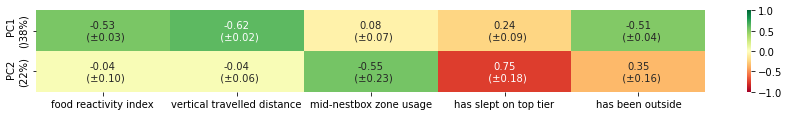

In [17]:
plt.figure(figsize=(15,1.5))
cmap_ = LinearSegmentedColormap.from_list('rg',["lightgrey", "black"], N=256) 
labels_ = np.array([['                   '] * len(li_mvt)] * 2)
for i in range(0,len(li_mvt)):
    labels_[0][i] = '%.2f' %round(comp1[i],2)+'\n  (±'+'%.2f' %round(np.std(abs(df_pc1loading[li_mvt[i]])),2) +')'
    labels_[1][i] = '%.2f' %round(comp2[i],2)+'\n  (±'+'%.2f' %round(np.std(abs(df_pc2loading[li_mvt[i]])),2) +')'
sns.heatmap(np.array([[i*-1 for i in comp1], [i*-1 for i in comp2]]), annot=labels_, fmt = '', cmap='RdYlGn',vmin=-1, vmax=1,
            yticklabels=['PC1 \n()'+str(round(li_exvar[0]*100))+'%)', 'PC2 \n('+str(round(li_exvar[1]*100))+'%)'], 
            xticklabels=[dico_mvt_name[i] for i in li_mvt]);
plt.yticks(rotation=90) 
plt.savefig(os.path.join(path_extracted_data,'BS_PrincComp_loadings.png'),dpi=300,format='png',bbox_inches='tight')
plt.show();

#TODO IF WE WANT a kind of general behavioural index
df_boi = df[~df['HenID'].isnull()].pivot(index='HenID', columns='mvtvariable', values='value_mean').reset_index()
print(df_boi.shape)
df_boi.head(3)
#compute pc1 and pc2
df_boi = df[~df['HenID'].isnull()].pivot(index='HenID', columns='mvtvariable', values='value_mean').reset_index()
print(df_boi.shape)
df_boi.head(3)
df_boi['pc1'] = df_boi.apply(lambda x: sum([x[k]*v for k,v in dico_mvt_pc1.items()]), axis=1)
df_boi['pc2'] = df_boi.apply(lambda x: sum([x[k]*v for k,v in dico_mvt_pc2.items()]), axis=1)
df_boi['pc1_only3var'] = df_boi.apply(lambda x: sum([x[k]*v for k,v in dico_mvt_pc1_3var.items()]), axis=1)
sns.scatterplot(x='pc1', y='pc2', data=df_boi);

### HenID Intercept

In [30]:
li_mvt

['scalefoodsameDurTimingr50final',
 'scaleverticaltraveldistancefulllightperinsideh',
 'midcumZ4hMorning',
 'SleepingUppest',
 'WentinWG']

,HenID_,value_mean_SleepingUppest,value_mean_WentinWG,value_mean_midcumZ4hMorning,value_mean_scalefoodsameDurTimingr50final,value_mean_scaleverticaltraveldistancefulllightperinsideh,lower_SleepingUppest,lower_WentinWG,lower_midcumZ4hMorning,lower_scalefoodsameDurTimingr50final,lower_scaleverticaltraveldistancefulllightperinsideh,upper_SleepingUppest,upper_WentinWG,upper_midcumZ4hMorning,upper_scalefoodsameDurTimingr50final,upper_scaleverticaltraveldistancefulllightperinsideh
0,hen_1,2.208298,2.328243,-0.158467,0.221288,-0.301648,-0.640495,0.163009,-0.252570,-0.252054,-0.697807,5.381855,4.652846,-0.059801,0.684166,0.078361
1,hen_10,-5.318128,-2.000353,-0.146506,-0.612222,-0.497050,-7.309788,-2.933147,-0.211359,-0.922638,-0.769758,-3.527459,-1.070450,-0.083842,-0.291491,-0.232643
2,hen_101,-1.633896,2.009370,0.020791,0.406987,0.341302,-2.531516,0.361227,-0.039933,0.079580,0.088995,-0.780185,3.661209,0.082096,0.725916,0.610677


scalefoodsameDurTimingr50final
scaleverticaltraveldistancefulllightperinsideh
0.465059034741178
0.560229729471072
0.831389908611922
0.6901550704166646


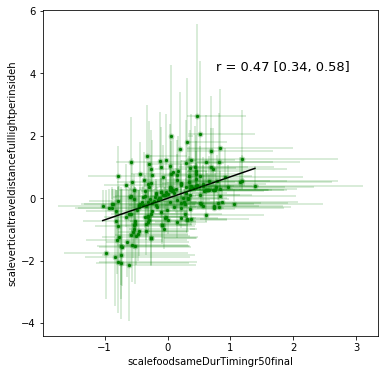

scalefoodsameDurTimingr50final
midcumZ4hMorning
-0.0931756470478832
0.560229729471072
0.139982646142513
-0.023281473552140376


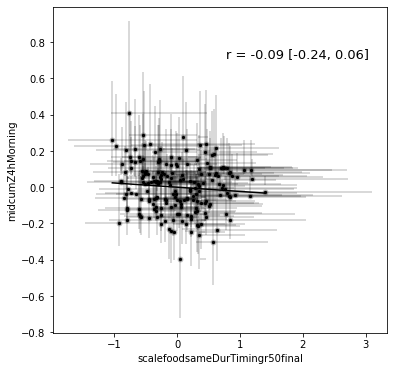

scalefoodsameDurTimingr50final
SleepingUppest
-0.186058576755429
0.560229729471072
2.27535488415186
-0.7556708776567509


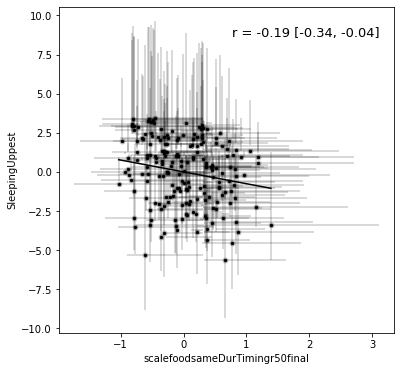

scalefoodsameDurTimingr50final
WentinWG
0.290938427041955
0.560229729471072
2.2027474245606
1.1439304934378176


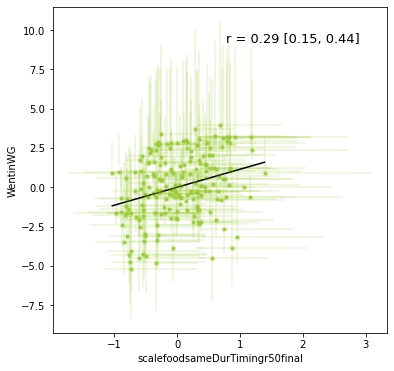

scaleverticaltraveldistancefulllightperinsideh
midcumZ4hMorning
-0.0221158475176731
0.831389908611922
0.139982646142513
-0.003723685872465032


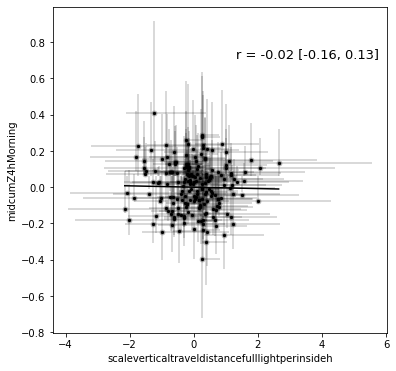

scaleverticaltraveldistancefulllightperinsideh
SleepingUppest
-0.241550862273192
0.831389908611922
2.27535488415186
-0.6610784284861349


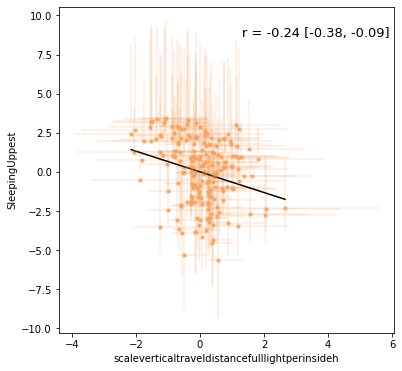

scaleverticaltraveldistancefulllightperinsideh
WentinWG
0.517974371201559
0.831389908611922
2.2027474245606
1.3723605498863631


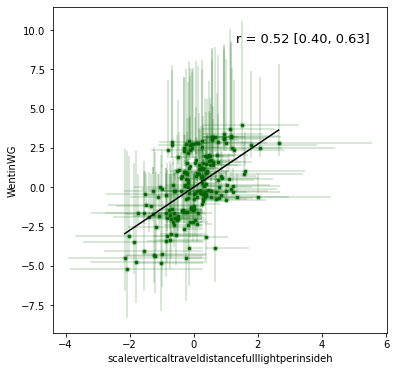

midcumZ4hMorning
SleepingUppest
-0.0432081158996342
0.139982646142513
2.27535488415186
-0.7023284689670845


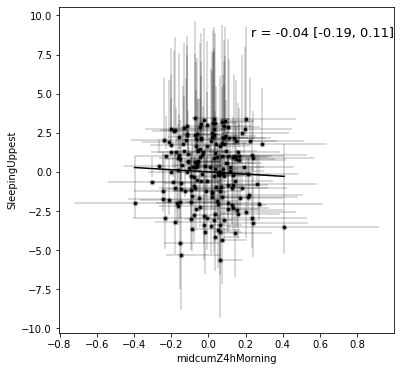

midcumZ4hMorning
WentinWG
-0.0379972358674182
0.139982646142513
2.2027474245606
-0.597919211801196


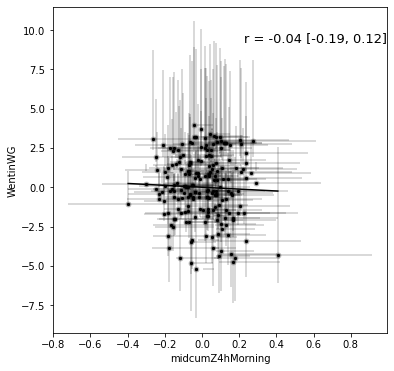

SleepingUppest
WentinWG
0.0473063259374819
2.27535488415186
2.2027474245606
0.0457967626720588


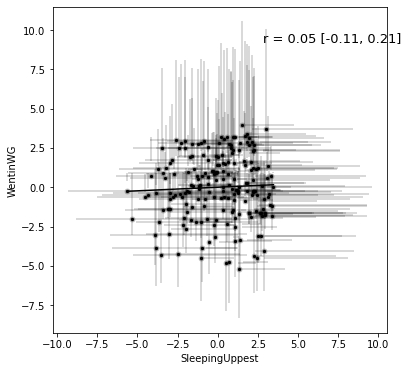

In [32]:
#choose color: https://matplotlib.org/stable/gallery/color/named_colors.html
#df[df['HenID'].isnull()].shape
df_plt = df[~df['HenID'].isnull()].pivot(index='HenID', columns='mvtvariable', values=['value_mean',
                                                                                       'lower','upper']).reset_index()
df_plt.columns = ['_'.join(col) for col in df_plt.columns.values] #joining name from different index
display(df_plt.head(3))
for i in range(0,len(li_mvt)-1):
    for j in range(i+1,len(li_mvt)):
        mvtx = li_mvt[i]
        mvty = li_mvt[j]
        print(mvtx)
        print(mvty)
        cor_mvtx_mvty = df_cor_summarized[(df_cor_summarized[mvtx])&(df_cor_summarized[mvty])]['value_mean'].iloc[0]
        cor_mvtx_mvty_upper = df_cor_summarized[(df_cor_summarized[mvtx])&(df_cor_summarized[mvty])]['upper'].iloc[0]
        cor_mvtx_mvty_lower = df_cor_summarized[(df_cor_summarized[mvtx])&(df_cor_summarized[mvty])]['lower'].iloc[0]
        print(cor_mvtx_mvty)
        sd_mvtx = df_sd_summarized[df_sd_summarized['parameter']==mvtx+'_Intercept']['value_mean'].iloc[0]
        print(sd_mvtx)
        sd_mvty = df_sd_summarized[df_sd_summarized['parameter']==mvty+'_Intercept']['value_mean'].iloc[0]
        print(sd_mvty)        
        slope = cor_mvtx_mvty*sd_mvtx*sd_mvty/(sd_mvtx*sd_mvtx)
        print(slope)
        #choose color:
        li_ = [mvtx, mvty]
        if ('scalefoodsameDurTimingr50final' in li_) & ('scaleverticaltraveldistancefulllightperinsideh' in li_):
            color_ = 'green'
        elif ('scalefoodsameDurTimingr50final' in li_) & ('WentinWG' in li_):
            color_ = 'yellowgreen' #lightsalmon
        elif ('scaleverticaltraveldistancefulllightperinsideh' in li_) & ('SleepingUppest' in li_):
            color_ = 'sandybrown'
        elif ('scaleverticaltraveldistancefulllightperinsideh' in li_) & ('WentinWG' in li_):
            color_ = 'darkgreen'
        else:
            color_ = 'black'
        plt.figure(figsize=(6,6))
        #ax = sns.scatterplot(data=df_plt, x='value_mean_'+mvtx,  y='value_mean_'+mvty)#,  size="size", sizes=(20, 200))
        plt.scatter(df_plt['value_mean_'+mvtx].tolist(), df_plt['value_mean_'+mvty].tolist(), color=color_, s=5)
        plt.errorbar(df_plt['value_mean_'+mvtx].tolist(), df_plt['value_mean_'+mvty].tolist(),
                     xerr=[df_plt['lower_'+mvtx].tolist(),df_plt['upper_'+mvtx].tolist()], 
                     yerr=[df_plt['lower_'+mvty].tolist(),df_plt['upper_'+mvty].tolist()],
                     fmt="o", color=color_, alpha=0.2,ms=5)
        plt.xlabel(mvtx)
        plt.ylabel(mvty)
        x_min = min(df_plt['value_mean_'+mvtx].tolist())
        y_min = x_min*slope
        x_max = max(df_plt['value_mean_'+mvtx].tolist())
        y_max = x_max*slope
        plt.plot([x_min, x_max], [y_min, y_max], color='black')
        text_ = 'r = '+"%.2f" % round(cor_mvtx_mvty,2)+' ['+"%.2f" % round(cor_mvtx_mvty_lower,2)+', '+"%.2f" % round(cor_mvtx_mvty_upper,2)+']'
        plt.text(max(df_plt['upper_'+mvtx].tolist())*0.45, max(df_plt['upper_'+mvty].tolist())*1.4, text_, fontsize=13)
        #plt.set_xlim([x_min, x_max])   
        plt.savefig(os.path.join(path_extracted_data,'BS_'+mvtx+'_'+mvty+'.png'),dpi=300,format='png',bbox_inches='tight')
        plt.show();

# Repeatability

In [4]:
#search in any folder and create a list of img paths
#os.walk: Python method walk() generates the file names in a directory tree by walking the tree top-down or bottom-up
#to avoid saving images several times, we will do it specifically for images in the KBF folder:
li_df = []
for path_ in glob.glob(os.path.join(path_extracted_data,'R_estimates_*.csv')):
    print('--------------------- files %s'%path_.split('\\')[-1])
    df_ = pd.read_csv(path_, sep=',')
    print(df_.shape) 
    display(df_.head(3))
    li_df.append(df_)
    
print('------------------------- ALL TOGETHER:')
df_R = pd.concat(li_df)    
print(df_R.shape) 
display(df_R.head(3))

--------------------- files R_estimates_FOOD.csv
(6, 14)


,Unnamed: 0,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE,li_popintercept,li_CVI,li_CVE
0,1,0.342634,0.288790,0.393919,193,3196,time,food_sameDurTiming_r50_final,0.211631,"0.0292 [0.0267, 0.0321]","0.056 [0.0534, 0.0589]","0.2821 [0.2265, 0.3386]",NaN,NaN
1,2,0.418743,0.318601,0.514615,156,466,LP2,food_sameDurTiming_r50_final,0.211631,"0.03 [0.0255, 0.0353]","0.0417 [0.0363, 0.0474]","0.2561 [0.1762, 0.334]",NaN,NaN
2,3,0.359023,0.258451,0.455162,152,450,LP10,food_sameDurTiming_r50_final,0.260822,"0.0362 [0.0297, 0.0435]","0.0646 [0.0574, 0.0741]","0.2739 [0.1906, 0.3505]",NaN,NaN


--------------------- files R_estimates_MZ4.csv
(6, 14)


,Unnamed: 0,li_R,li_CIL,li_CIU,li_CILbasic,li_CIUbasic,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE,li_popintercept,li_CVI,li_CVE
0,1,0.524940,0.487688,0.562055,0.419257,0.493624,time,mid_cum_Z4_h_Morning,4.484653,"0.0233 [0.0212, 0.0259]","0.0211 [0.0194, 0.0229]","4.4352 [4.3956, 4.4768]","0.0725 [0.0692, 0.0762]","0.0689 [0.0661, 0.0717]"
1,2,0.664619,0.507791,0.798267,0.161902,0.452378,LP2,mid_cum_Z4_h_Morning,4.312542,"0.024 [0.0187, 0.03]","0.0122 [0.0071, 0.0183]","4.2926 [4.2098, 4.3699]","0.0747 [0.0659, 0.0838]","0.0528 [0.0406, 0.0655]"
2,3,0.560629,0.404274,0.718106,-0.051455,0.262377,LP10,mid_cum_Z4_h_Morning,5.341380,"0.0248 [0.0179, 0.0346]","0.0195 [0.0121, 0.0283]","5.2745 [5.1433, 5.3915]","0.0684 [0.0581, 0.0816]","0.0605 [0.048, 0.0733]"


--------------------- files R_estimates_SNU.csv
(6, 11)


,Unnamed: 0,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE
0,1,0.507438,0.404499,0.569066,193,3196,time,Sleeping_Uppest,0.705569,"4.9591 [3.4281, 6.2891]","4.8137 [4.4943, 5.3878]"
1,2,0.709584,0.566893,0.956151,156,466,LP2,Sleeping_Uppest,0.736052,"12.5764 [7.0444, 129.45]","5.1472 [4.8597, 6.7691]"
2,3,0.708462,0.508812,0.785045,152,450,LP10,Sleeping_Uppest,0.595556,"10.0888 [4.431, 17.1282]","4.1516 [4.0352, 4.596]"


--------------------- files R_estimates_VTD.csv
(6, 14)


,Unnamed: 0,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE,li_popintercept,li_CVI,li_CVE
0,1,0.699190,0.650149,0.740672,193,3196,time,vertical_travel_distance_fulllight_perinsideh,4.300298,"2.2116 [2.0772, 2.3522]","0.9515 [0.9045, 1.0001]","4.3109 [3.9911, 4.6006]","0.7163 [0.6873, 0.755]","0.4698 [0.4507, 0.4914]"
1,2,0.764048,0.704902,0.813420,156,466,LP2,vertical_travel_distance_fulllight_perinsideh,4.115942,"2.492 [2.2555, 2.7248]","0.7696 [0.6744, 0.8805]","4.4618 [4.0912, 4.7984]","0.7473 [0.7037, 0.7949]","0.4153 [0.3862, 0.452]"
2,3,0.756793,0.695731,0.805729,152,450,LP10,vertical_travel_distance_fulllight_perinsideh,3.534598,"1.3233 [1.1865, 1.4714]","0.4253 [0.3745, 0.4873]","3.5668 [3.2951, 3.8415]","0.6091 [0.5711, 0.6503]","0.3453 [0.3216, 0.3739]"


--------------------- files R_estimates_WG.csv
(6, 11)


,Unnamed: 0,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE
0,1,0.518469,0.422358,0.577089,193,3196,time,WentinWG,0.685544,"4.9946 [3.4546, 6.3031]","4.6388 [4.2892, 4.9532]"
1,2,0.565208,0.342514,0.691079,156,466,LP2,WentinWG,0.680258,"5.9766 [2.4006, 11.6353]","4.5975 [4.3155, 5.2882]"
2,3,0.932416,0.963786,0.991588,152,450,LP10,WentinWG,0.815556,"91.7163 [180.2635, 680.2795]","6.6478 [5.1136, 7.9901]"


------------------------- ALL TOGETHER:
(30, 16)


,Unnamed: 0,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE,li_popintercept,li_CVI,li_CVE,li_CILbasic,li_CIUbasic
0,1,0.342634,0.288790,0.393919,193.0,3196.0,time,food_sameDurTiming_r50_final,0.211631,"0.0292 [0.0267, 0.0321]","0.056 [0.0534, 0.0589]","0.2821 [0.2265, 0.3386]",NaN,NaN,NaN,NaN
1,2,0.418743,0.318601,0.514615,156.0,466.0,LP2,food_sameDurTiming_r50_final,0.211631,"0.03 [0.0255, 0.0353]","0.0417 [0.0363, 0.0474]","0.2561 [0.1762, 0.334]",NaN,NaN,NaN,NaN
2,3,0.359023,0.258451,0.455162,152.0,450.0,LP10,food_sameDurTiming_r50_final,0.260822,"0.0362 [0.0297, 0.0435]","0.0646 [0.0574, 0.0741]","0.2739 [0.1906, 0.3505]",NaN,NaN,NaN,NaN


In [5]:
#create a matrix with each row correpsonding to a movement behavior and each column a situation (over time, wihtin a context,
#across context)
#add R and 96% interval as a text column
df_R['text'] = df_R.apply(lambda x: str(round(x['li_R'],2))+' ['+str(round(x['li_CIL'],2))+', '+str(round(x['li_CIU'],2))+']', 
                          axis=1)
df_R.head(3)

,Unnamed: 0,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE,li_popintercept,li_CVI,li_CVE,li_CILbasic,li_CIUbasic,text
0,1,0.342634,0.288790,0.393919,193.0,3196.0,time,food_sameDurTiming_r50_final,0.211631,"0.0292 [0.0267, 0.0321]","0.056 [0.0534, 0.0589]","0.2821 [0.2265, 0.3386]",NaN,NaN,NaN,NaN,"0.34 [0.29, 0.39]"
1,2,0.418743,0.318601,0.514615,156.0,466.0,LP2,food_sameDurTiming_r50_final,0.211631,"0.03 [0.0255, 0.0353]","0.0417 [0.0363, 0.0474]","0.2561 [0.1762, 0.334]",NaN,NaN,NaN,NaN,"0.42 [0.32, 0.51]"
2,3,0.359023,0.258451,0.455162,152.0,450.0,LP10,food_sameDurTiming_r50_final,0.260822,"0.0362 [0.0297, 0.0435]","0.0646 [0.0574, 0.0741]","0.2739 [0.1906, 0.3505]",NaN,NaN,NaN,NaN,"0.36 [0.26, 0.46]"


In [6]:
dico_bstype_order = {'AC':6, 'LP10':5, 'LP2':2, 'VD':4, 'cold':3, 'time':1}
dico_bstype_name = {'AC':'AC', 'LP10':'LLS', 'LP2':'ELS', 'VD':'VD', 'cold':'CET', 'time':'OT'}
df_R['order'] = df_R['li_BStype'].map(lambda x: dico_bstype_order[x])
df_R['li_BStype'] = df_R['li_BStype'].map(lambda x: dico_bstype_name[x])
df_R = df_R.sort_values(['order'])
df_R

,Unnamed: 0,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE,li_popintercept,li_CVI,li_CVE,li_CILbasic,li_CIUbasic,text,order
0,1,0.342634,0.288790,0.393919,193.0,3196.0,OT,food_sameDurTiming_r50_final,0.211631,"0.0292 [0.0267, 0.0321]","0.056 [0.0534, 0.0589]","0.2821 [0.2265, 0.3386]",NaN,NaN,NaN,NaN,"0.34 [0.29, 0.39]",1
0,1,0.699190,0.650149,0.740672,193.0,3196.0,OT,vertical_travel_distance_fulllight_perinsideh,4.300298,"2.2116 [2.0772, 2.3522]","0.9515 [0.9045, 1.0001]","4.3109 [3.9911, 4.6006]","0.7163 [0.6873, 0.755]","0.4698 [0.4507, 0.4914]",NaN,NaN,"0.7 [0.65, 0.74]",1
0,1,0.507438,0.404499,0.569066,193.0,3196.0,OT,Sleeping_Uppest,0.705569,"4.9591 [3.4281, 6.2891]","4.8137 [4.4943, 5.3878]",NaN,NaN,NaN,NaN,NaN,"0.51 [0.4, 0.57]",1
0,1,0.524940,0.487688,0.562055,NaN,NaN,OT,mid_cum_Z4_h_Morning,4.484653,"0.0233 [0.0212, 0.0259]","0.0211 [0.0194, 0.0229]","4.4352 [4.3956, 4.4768]","0.0725 [0.0692, 0.0762]","0.0689 [0.0661, 0.0717]",0.419257,0.493624,"0.52 [0.49, 0.56]",1
0,1,0.518469,0.422358,0.577089,193.0,3196.0,OT,WentinWG,0.685544,"4.9946 [3.4546, 6.3031]","4.6388 [4.2892, 4.9532]",NaN,NaN,NaN,NaN,NaN,"0.52 [0.42, 0.58]",1
1,2,0.418743,0.318601,0.514615,156.0,466.0,ELS,food_sameDurTiming_r50_final,0.211631,"0.03 [0.0255, 0.0353]","0.0417 [0.0363, 0.0474]","0.2561 [0.1762, 0.334]",NaN,NaN,NaN,NaN,"0.42 [0.32, 0.51]",2
1,2,0.709584,0.566893,0.956151,156.0,466.0,ELS,Sleeping_Uppest,0.736052,"12.5764 [7.0444, 129.45]","5.1472 [4.8597, 6.7691]",NaN,NaN,NaN,NaN,NaN,"0.71 [0.57, 0.96]",2
1,2,0.664619,0.507791,0.798267,NaN,NaN,ELS,mid_cum_Z4_h_Morning,4.312542,"0.024 [0.0187, 0.03]","0.0122 [0.0071, 0.0183]","4.2926 [4.2098, 4.3699]","0.0747 [0.0659, 0.0838]","0.0528 [0.0406, 0.0655]",0.161902,0.452378,"0.66 [0.51, 0.8]",2
1,2,0.565208,0.342514,0.691079,156.0,466.0,ELS,WentinWG,0.680258,"5.9766 [2.4006, 11.6353]","4.5975 [4.3155, 5.2882]",NaN,NaN,NaN,NaN,NaN,"0.57 [0.34, 0.69]",2
1,2,0.764048,0.704902,0.813420,156.0,466.0,ELS,vertical_travel_distance_fulllight_perinsideh,4.115942,"2.492 [2.2555, 2.7248]","0.7696 [0.6744, 0.8805]","4.4618 [4.0912, 4.7984]","0.7473 [0.7037, 0.7949]","0.4153 [0.3862, 0.452]",NaN,NaN,"0.76 [0.7, 0.81]",2


In [8]:
#all R with CI
df_plt = df_R.pivot(index='li_mvt', columns='li_BStype', values='text').reset_index()
df_plt = df_plt[['li_mvt','OT','ELS','CET','VD','LLS','AC']]
df_plt

li_BStype,li_mvt,OT,ELS,CET,VD,LLS,AC
0,Sleeping_Uppest,"0.51 [0.4, 0.57]","0.71 [0.57, 0.96]","0.57 [0.26, 0.98]","0.49 [0.25, 0.74]","0.71 [0.51, 0.79]","0.51 [0.31, 0.61]"
1,WentinWG,"0.52 [0.42, 0.58]","0.57 [0.34, 0.69]","0.57 [0.25, 0.72]","0.3 [0.1, 0.38]","0.93 [0.96, 0.99]","0.31 [0.15, 0.4]"
2,food_sameDurTiming_r50_final,"0.34 [0.29, 0.39]","0.42 [0.32, 0.51]","0.32 [0.2, 0.47]","0.22 [0.11, 0.34]","0.36 [0.26, 0.46]","0.24 [0.15, 0.33]"
3,mid_cum_Z4_h_Morning,"0.52 [0.49, 0.56]","0.66 [0.51, 0.8]","0.79 [0.68, 0.88]","0.58 [0.44, 0.7]","0.56 [0.4, 0.72]","0.54 [0.44, 0.64]"
4,vertical_travel_distance_fulllight_perinsideh,"0.7 [0.65, 0.74]","0.76 [0.7, 0.81]","0.82 [0.76, 0.86]","0.52 [0.43, 0.61]","0.76 [0.7, 0.81]","0.53 [0.44, 0.6]"


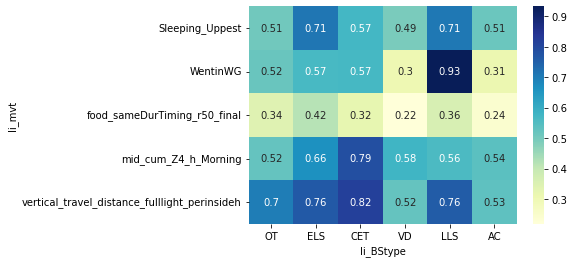

In [9]:
#all R with colors
df_plt = df_R.pivot(index='li_mvt', columns='li_BStype', values='li_R')#.reset_index()
df_plt = df_plt[['OT','ELS','CET','VD','LLS','AC']]
#df_plt
li_col = list(df_R['li_BStype'].unique())
li_col
# If we do a heatmap, we just observe that one column has higher values than others:
sns.heatmap(df_plt, cmap='YlGnBu', annot=True,
            xticklabels=list(df_plt.columns), yticklabels=list(df_plt.index))
plt.savefig(os.path.join(path_extracted_data,'R_all.png'),dpi=300,format='png',bbox_inches='tight')
plt.show()

### row wise - mvt wise

In [10]:
#https://stackoverflow.com/questions/38246559/how-to-create-a-heat-map-in-python-that-ranges-from-green-to-red
#cmap_ = LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 
cmap_ = LinearSegmentedColormap.from_list('rg',["lightgrey", "black"], N=256) 
#cmap='RdYlGn'

li_BStype,OT,ELS,CET,VD,LLS,AC
li_mvt,,,,,,
Sleeping_Uppest,0.060671,1.000000,0.359114,0.000000,0.994787,0.094542
WentinWG,0.342741,0.416953,0.424188,0.000000,1.000000,0.013926
food_sameDurTiming_r50_final,0.619506,1.000000,0.515734,0.000000,0.701440,0.123369
mid_cum_Z4_h_Morning,0.000000,0.533708,1.000000,0.199395,0.136365,0.049797
vertical_travel_distance_fulllight_perinsideh,0.598613,0.819103,1.000000,0.000000,0.794439,0.030243


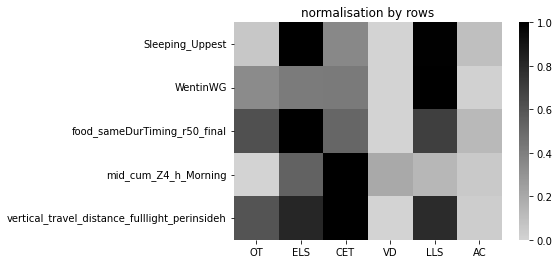

In [11]:
#normalize by row
df_plt_nr = df_plt.copy()
#list(df_plt_nc.index): keep same order
for mv in list(df_plt_nr.index): 
    df_plt_nr.loc[mv] = (df_plt_nr.loc[mv]-df_plt_nr.loc[mv].min())/(df_plt_nr.loc[mv].max()-df_plt_nr.loc[mv].min())
display(df_plt_nr)
sns.heatmap(df_plt_nr, cmap=cmap_, annot=False,
        xticklabels=list(df_plt_nr.columns), yticklabels=list(df_plt_nr.index))
plt.xlabel('');
plt.ylabel('');
plt.title('normalisation by rows')
plt.savefig(os.path.join(path_extracted_data,'R_normalizedrowwise.png'),dpi=300,format='png',bbox_inches='tight')
plt.show();

### columns wise - within context

li_BStype,OT,ELS,CET,VD,LLS,AC
li_mvt,,,,,,
Sleeping_Uppest,0.462210,0.842273,0.504229,0.769135,0.609423,0.921086
WentinWG,0.493149,0.424162,0.500397,0.234065,1.000000,0.230785
food_sameDurTiming_r50_final,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mid_cum_Z4_h_Morning,0.511299,0.712054,0.938218,1.000000,0.351602,1.000000
vertical_travel_distance_fulllight_perinsideh,1.000000,1.000000,1.000000,0.849276,0.693712,0.979725


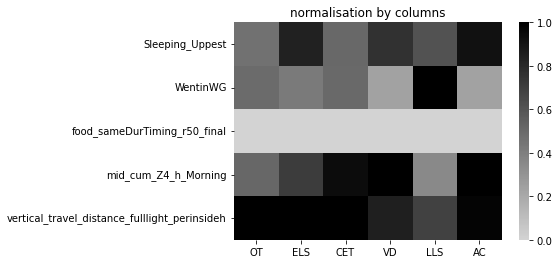

In [12]:
#normalize by column
df_plt_nc = (df_plt[li_col]-df_plt[li_col].min())/(df_plt[li_col].max()-df_plt[li_col].min())
display(df_plt_nc)
sns.heatmap(df_plt_nc, cmap=cmap_, annot=False,
            xticklabels=list(df_plt_nc.columns), yticklabels=list(df_plt_nc.index))
plt.xlabel('');
plt.ylabel('');
plt.title('normalisation by columns')
plt.savefig(os.path.join(path_extracted_data,'R_normalizedcolumnwise.png'),dpi=300,format='png',bbox_inches='tight')
plt.show();

### check other than repeatability output


In [13]:
#check metadata
#small check: 
display(df_R[['li_BStype','li_mvt','li_ngroup','li_nobs']].sort_values(['li_BStype','li_mvt'])) #CORRECT!
df_R[df_R['li_mvt']=='vertical_travel_distance_fulllight_perinsideh'][['li_BStype','li_ngroup','li_nobs']]

,li_BStype,li_mvt,li_ngroup,li_nobs
5,AC,Sleeping_Uppest,191.0,614.0
5,AC,WentinWG,191.0,614.0
5,AC,food_sameDurTiming_r50_final,191.0,614.0
5,AC,mid_cum_Z4_h_Morning,NaN,NaN
5,AC,vertical_travel_distance_fulllight_perinsideh,191.0,614.0
3,CET,Sleeping_Uppest,157.0,312.0
3,CET,WentinWG,157.0,312.0
3,CET,food_sameDurTiming_r50_final,157.0,312.0
3,CET,mid_cum_Z4_h_Morning,NaN,NaN
3,CET,vertical_travel_distance_fulllight_perinsideh,157.0,312.0


,li_BStype,li_ngroup,li_nobs
0,OT,193.0,3196.0
1,ELS,156.0,466.0
3,CET,157.0,312.0
4,VD,193.0,468.0
2,LLS,152.0,450.0
5,AC,191.0,614.0


In [14]:
#within and between ind variation, trait mean
df_R['verification'] = df_R.apply(lambda x: float(x['li_VI'].split(' ')[0])/(float(x['li_VI'].split(' ')[0])+float(x['li_VE'].split(' ')[0])), axis=1)
df_R['isequal'] = df_R.apply(lambda x: round(x['li_R'],2)==round(x['verification'],2), axis=1)
if df_R[~df_R['isequal']].shape[0]!=0:
    print('ERROR in your within / between indiviudal variance!')
    sys.exit()
df_R.sort_values(['li_mvt'])[['li_BStype','li_mvt','li_R','verification','isequal','li_VI','li_VE','li_mvtmean']]

,li_BStype,li_mvt,li_R,verification,isequal,li_VI,li_VE,li_mvtmean
5,AC,Sleeping_Uppest,0.514727,0.514725,True,"5.0231 [2.307, 7.7086]","4.7357 [4.5531, 5.6811]",0.697068
0,OT,Sleeping_Uppest,0.507438,0.507439,True,"4.9591 [3.4281, 6.2891]","4.8137 [4.4943, 5.3878]",0.705569
2,LLS,Sleeping_Uppest,0.708462,0.708463,True,"10.0888 [4.431, 17.1282]","4.1516 [4.0352, 4.596]",0.595556
1,ELS,Sleeping_Uppest,0.709584,0.709585,True,"12.5764 [7.0444, 129.45]","5.1472 [4.8597, 6.7691]",0.736052
4,VD,Sleeping_Uppest,0.494381,0.494378,True,"4.7226 [1.9064, 45.0679]","4.83 [4.56, 5.7857]",0.707265
3,CET,Sleeping_Uppest,0.571663,0.571664,True,"6.5459 [1.9993, 225.6314]","4.9047 [4.5219, 5.9956]",0.714744
5,AC,WentinWG,0.311379,0.311377,True,"1.9958 [0.7808, 2.885]","4.4138 [4.1938, 4.7505]",0.653094
0,OT,WentinWG,0.518469,0.518467,True,"4.9946 [3.4546, 6.3031]","4.6388 [4.2892, 4.9532]",0.685544
2,LLS,WentinWG,0.932416,0.932416,True,"91.7163 [180.2635, 680.2795]","6.6478 [5.1136, 7.9901]",0.815556
1,ELS,WentinWG,0.565208,0.565211,True,"5.9766 [2.4006, 11.6353]","4.5975 [4.3155, 5.2882]",0.680258


In [15]:
dico_bstype_name = {'AC':'across context',
                    'OT':'over time',
                    'LLS':'late life stage',
                    'ELS':'early life stage',
                    'VD':'vaccination disturbance',
                    'CET':'cold external temperature'}
dico_mvt_name = {'food_sameDurTiming_r50_final':'food reactivity index',
                 'vertical_travel_distance_fulllight_perinsideh':'vertical travelled distance',
                 'mid_cum_Z4_h_Morning':'mid-nestbox zone usage',
                 'Sleeping_Uppest':'has slept on top tier',
                 'WentinWG':'has been outside'}
df_VIVEM = df_R.sort_values(['li_mvt'])[['li_BStype','li_mvt','li_VI','li_VE','li_mvtmean']].copy()
df_VIVEM['li_mvt'] = df_VIVEM['li_mvt'].apply(lambda x: dico_mvt_name[x])
df_VIVEM['li_BStype'] = df_VIVEM['li_BStype'].apply(lambda x: dico_bstype_name[x])
df_VIVEM.rename(columns={'li_mvt': 'movement behaviour', 'li_BStype':'situations',
                        'li_VI':'between-individual variance',
                        'li_VE':'within-individual variance',
                        'li_mvtmean':'trait meant'}, inplace=True)
df_VIVEM.to_csv(os.path.join(path_extracted_data,'BS_df_VI_VE_TraitMean.csv'), index=False, sep=',')
df_VIVEM

,situations,movement behaviour,between-individual variance,within-individual variance,trait meant
5,across context,has slept on top tier,"5.0231 [2.307, 7.7086]","4.7357 [4.5531, 5.6811]",0.697068
0,over time,has slept on top tier,"4.9591 [3.4281, 6.2891]","4.8137 [4.4943, 5.3878]",0.705569
2,late life stage,has slept on top tier,"10.0888 [4.431, 17.1282]","4.1516 [4.0352, 4.596]",0.595556
1,early life stage,has slept on top tier,"12.5764 [7.0444, 129.45]","5.1472 [4.8597, 6.7691]",0.736052
4,vaccination disturbance,has slept on top tier,"4.7226 [1.9064, 45.0679]","4.83 [4.56, 5.7857]",0.707265
3,cold external temperature,has slept on top tier,"6.5459 [1.9993, 225.6314]","4.9047 [4.5219, 5.9956]",0.714744
5,across context,has been outside,"1.9958 [0.7808, 2.885]","4.4138 [4.1938, 4.7505]",0.653094
0,over time,has been outside,"4.9946 [3.4546, 6.3031]","4.6388 [4.2892, 4.9532]",0.685544
2,late life stage,has been outside,"91.7163 [180.2635, 680.2795]","6.6478 [5.1136, 7.9901]",0.815556
1,early life stage,has been outside,"5.9766 [2.4006, 11.6353]","4.5975 [4.3155, 5.2882]",0.680258
